<a href="https://colab.research.google.com/github/AssiaThabet/first_git/blob/main/rquation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

x_train = np.array([[1, 17, -18], [5,7, 2], [1,-11,18], [1,-13,-36], [2,-9,7], [3,-11,4]])


y = np.array([1, -1, 2, 9, 1, 1/3])


In [ ]:
# Среднее значение
mean = x_train.mean(axis=0)
x_train = x_train.astype('float32')
# Стандартное отклонение
std = x_train.std(axis=0)
x_train -= mean
x_train /= std

In [ ]:
x_train

array([[-0.79772395,  1.8027152 , -0.79094577],
       [ 1.9373296 ,  0.9161339 ,  0.32568356],
       [-0.79772395, -0.67971224,  1.218987  ],
       [-0.79772395, -0.85702854, -1.7959123 ],
       [-0.11396057, -0.502396  ,  0.6048409 ],
       [ 0.5698028 , -0.67971224,  0.4373465 ]], dtype=float32)

In [ ]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
fit = model.fit(x_train, y, epochs=100, batch_size=1, verbose=2, validation_split = 0.2)

Epoch 1/100
4/4 - 1s - loss: 22.4412 - mae: 3.3882 - val_loss: 0.6897 - val_mae: 0.7333 - 732ms/epoch - 183ms/step
Epoch 2/100
4/4 - 0s - loss: 21.6719 - mae: 3.3164 - val_loss: 0.6414 - val_mae: 0.7044 - 35ms/epoch - 9ms/step
Epoch 3/100
4/4 - 0s - loss: 21.0631 - mae: 3.2497 - val_loss: 0.6070 - val_mae: 0.6835 - 28ms/epoch - 7ms/step
Epoch 4/100
4/4 - 0s - loss: 20.7349 - mae: 3.1968 - val_loss: 0.5687 - val_mae: 0.6584 - 29ms/epoch - 7ms/step
Epoch 5/100
4/4 - 0s - loss: 20.2790 - mae: 3.1353 - val_loss: 0.5323 - val_mae: 0.6339 - 32ms/epoch - 8ms/step
Epoch 6/100
4/4 - 0s - loss: 19.7534 - mae: 3.0727 - val_loss: 0.4959 - val_mae: 0.6087 - 32ms/epoch - 8ms/step
Epoch 7/100
4/4 - 0s - loss: 19.1095 - mae: 3.0092 - val_loss: 0.4618 - val_mae: 0.5846 - 34ms/epoch - 8ms/step
Epoch 8/100
4/4 - 0s - loss: 18.7308 - mae: 2.9546 - val_loss: 0.4285 - val_mae: 0.5596 - 31ms/epoch - 8ms/step
Epoch 9/100
4/4 - 0s - loss: 18.2307 - mae: 2.8941 - val_loss: 0.4032 - val_mae: 0.5403 - 33ms/epoch 

In [ ]:
mse, mae = model.evaluate(x_train, y, verbose=0)

In [ ]:
print("Средняя абсолютная ошибка:", mae)

Средняя абсолютная ошибка: 0.24074696004390717


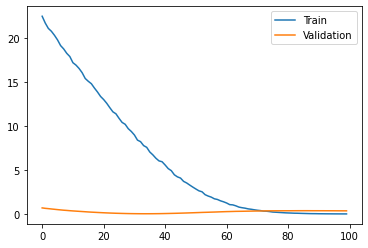

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fit.history['loss'], label = 'Train')
plt.plot(fit.history['val_loss'], label = 'Validation')
plt.legend()

In [ ]:
x_test = np.array([[1, 9, 18]])

In [ ]:
pred = model.predict(x_test)

In [ ]:
print("Предсказанное:", pred, ", правильное:", -3)

Предсказанное: [[-3.7461715]] , правильное: -3


In [ ]:
pred2 = model.predict(x_train)

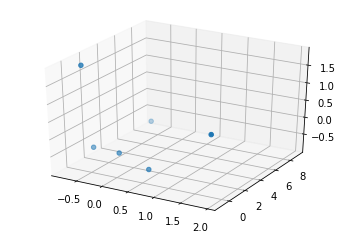

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.array([i[0] for i in x_train])
z = np.array([i[1] for i in x_train])
y1 = np.array(y)
#y1 = np.array([i[2] for i in x_train])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y1, z, label='parametric curve')
